In [1]:
import pandas as pd
import seaborn as sns
import collections.abc
import numpy as np

In [5]:
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping
import hts

In [6]:
train = pd.read_csv(
    open(
        r'C:\Users\cmgas\OneDrive\git\Best-Buy-Case\train_data.csv', 'rb'),
)

References and documentation for hierarchical time series models:
Theory: https://otexts.com/fpp2/hts.html
SKU example: https://github.com/carlomazzaferro/scikit-hts-examples/blob/master/notebooks/M5.ipynb
Australia state example: https://towardsdatascience.com/introduction-to-hierarchical-time-series-forecasting-part-ii-e73dfd3de86b

In [7]:
train.head(5)

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,GSPI,INDEX OF CONSUMER SENTIMENT,SALES_YEAR,SALES_MONTH,SALES_DAY,SALES_WEEKDAY
0,224,5/28/2017,DSLR CAMERAS,CAMERAS - ILC,ML - ILC Cameras/Lenses,VP - Digital Imaging,4599.99,NaN,NaN,Fully-Stocked,0,0.095363,97.1,2017,5,28,6
1,24,5/28/2017,DIGITAL CAMERAS,CAMERAS - P&S,ML - P&S and Action Cams and Drones,VP - Digital Imaging,388.99,NaN,NaN,Fully-Stocked,0,0.095363,97.1,2017,5,28,6
2,463,5/28/2017,DIGITAL CAMERAS,CAMERAS - P&S,ML - P&S and Action Cams and Drones,VP - Digital Imaging,139.99,NaN,NaN,Fully-Stocked,0,0.095363,97.1,2017,5,28,6
3,9,5/28/2017,DIGITAL VIDEO,DIGITAL CAMCORDERS,ML - P&S and Action Cams and Drones,VP - Digital Imaging,599.99,NaN,NaN,Fully-Stocked,0,0.095363,97.1,2017,5,28,6
4,2,5/28/2017,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,NaN,NaN,Out-of-Stock,0,0.095363,97.1,2017,5,28,6


In [8]:
train =  train.astype({'Encoded_SKU_ID':'str'})

In [9]:
train.columns = [col_name.lower() for col_name in train.columns]

In [10]:
train["subclass_name"] = train["subclass_name"].apply(lambda x: x.lower().replace(" ", ""))
train["class_name"] = train["class_name"].apply(lambda x: x.lower().replace(" ", ""))
train["ml_name"] = train["ml_name"].apply(lambda x: x.lower().replace(" ", ""))
train["category_name"] = train["category_name"].apply(lambda x: x.lower().replace(" ", ""))

In [11]:
#create the bottom level (level 6) id:
train["cat_ml_class_sub_sku"] = train.apply(lambda x: f"{x['category_name']}_{x['ml_name']}_{x['class_name']}_{x['subclass_name']}_{x['encoded_sku_id']}", axis=1)

In [12]:
#create the level 5 id:
train["cat_ml_class_sub"] = train.apply(lambda x: f"{x['category_name']}_{x['ml_name']}_{x['class_name']}_{x['subclass_name']}", axis=1)

In [13]:
#create the level 4 id:
train["cat_ml_class"] = train.apply(lambda x: f"{x['category_name']}_{x['ml_name']}_{x['class_name']}", axis=1)

In [14]:
#create the level 3 id:
train["cat_ml"] = train.apply(lambda x: f"{x['category_name']}_{x['ml_name']}", axis=1)

In [15]:
train['sales_date'] =  pd.to_datetime(train['sales_date'])

In [16]:
train.head(5)

,encoded_sku_id,sales_date,subclass_name,class_name,ml_name,category_name,retail_price,promo_price,competitor_price,inventory,...,gspi,index of consumer sentiment,sales_year,sales_month,sales_day,sales_weekday,cat_ml_class_sub_sku,cat_ml_class_sub,cat_ml_class,cat_ml
0,224,2017-05-28,dslrcameras,cameras-ilc,ml-ilccameras/lenses,vp-digitalimaging,4599.99,NaN,NaN,Fully-Stocked,...,0.095363,97.1,2017,5,28,6,vp-digitalimaging_ml-ilccameras/lenses_cameras...,vp-digitalimaging_ml-ilccameras/lenses_cameras...,vp-digitalimaging_ml-ilccameras/lenses_cameras...,vp-digitalimaging_ml-ilccameras/lenses
1,24,2017-05-28,digitalcameras,cameras-p&s,ml-p&sandactioncamsanddrones,vp-digitalimaging,388.99,NaN,NaN,Fully-Stocked,...,0.095363,97.1,2017,5,28,6,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones
2,463,2017-05-28,digitalcameras,cameras-p&s,ml-p&sandactioncamsanddrones,vp-digitalimaging,139.99,NaN,NaN,Fully-Stocked,...,0.095363,97.1,2017,5,28,6,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones
3,9,2017-05-28,digitalvideo,digitalcamcorders,ml-p&sandactioncamsanddrones,vp-digitalimaging,599.99,NaN,NaN,Fully-Stocked,...,0.095363,97.1,2017,5,28,6,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones
4,2,2017-05-28,camerabatteries,digitalcameraaccy,ml-diaccessories,vp-digitalimaging,39.99,NaN,NaN,Out-of-Stock,...,0.095363,97.1,2017,5,28,6,vp-digitalimaging_ml-diaccessories_digitalcame...,vp-digitalimaging_ml-diaccessories_digitalcame...,vp-digitalimaging_ml-diaccessories_digitalcame...,vp-digitalimaging_ml-diaccessories


In [17]:
#inspect all the MLs per category:
train.groupby("category_name")["ml_name"].apply(set).to_frame()

,ml_name
category_name,
vp-digitalimaging,"{ml-ilccameras/lenses, ml-p&sandactioncamsandd..."
vp-electrify&car,"{ml-electrify, ml-connectedcar}"
vp-majorappliances,"{ml-premium, ml-laundry, ml-kitchen}"


In [18]:
#inspect all the classes per ML:
train.groupby("ml_name")["class_name"].apply(set).to_frame()

,class_name
ml_name,
ml-connectedcar,"{satelliteradiohdwe, carelectronics, carstereo..."
ml-diaccessories,"{digitalcameraaccy, flashmemory}"
ml-electrify,{e-transportation}
ml-ilccameras/lenses,"{cameras-ilc, lenses}"
ml-kitchen,"{builtincooking, dishwashers, kitchenventilati..."
ml-laundry,"{pedestals&stacking, laundry}"
ml-p&sandactioncamsanddrones,"{digitalcamcorders, drones, cameras-p&s}"
ml-premium,{premiummajorappl}


In [19]:
#inspect all the subclasses per class:
train.groupby("class_name")["subclass_name"].apply(set).to_frame()

,subclass_name
class_name,
built-inrefrigeratr,"{wineandbevcooler, sowinebevcoolreg}"
builtincooking,"{sogascooktopreg, soelsingovenreg, somiccombwl..."
cameras-ilc,"{dslrcameras, mirrorlesscameras}"
cameras-p&s,"{sodigitalcameras, instantprinthw, digitalcame..."
carelectronics,"{radardetector, collisionavoidance, somobileel..."
carstereo,"{powersports, eqanddsp, amps, soeqanddsp, sopo..."
digitalcamcorders,"{cameraproproducts, stabilizers, digitalvideo}"
digitalcameraaccy,"{flashes, cclighting, digitalphotoframes, trip..."
dishwashers,"{sodishwasherreg, dishwasher, sodishwasherbbhd}"


In [20]:
train.head(5)

,encoded_sku_id,sales_date,subclass_name,class_name,ml_name,category_name,retail_price,promo_price,competitor_price,inventory,...,gspi,index of consumer sentiment,sales_year,sales_month,sales_day,sales_weekday,cat_ml_class_sub_sku,cat_ml_class_sub,cat_ml_class,cat_ml
0,224,2017-05-28,dslrcameras,cameras-ilc,ml-ilccameras/lenses,vp-digitalimaging,4599.99,NaN,NaN,Fully-Stocked,...,0.095363,97.1,2017,5,28,6,vp-digitalimaging_ml-ilccameras/lenses_cameras...,vp-digitalimaging_ml-ilccameras/lenses_cameras...,vp-digitalimaging_ml-ilccameras/lenses_cameras...,vp-digitalimaging_ml-ilccameras/lenses
1,24,2017-05-28,digitalcameras,cameras-p&s,ml-p&sandactioncamsanddrones,vp-digitalimaging,388.99,NaN,NaN,Fully-Stocked,...,0.095363,97.1,2017,5,28,6,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones
2,463,2017-05-28,digitalcameras,cameras-p&s,ml-p&sandactioncamsanddrones,vp-digitalimaging,139.99,NaN,NaN,Fully-Stocked,...,0.095363,97.1,2017,5,28,6,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones
3,9,2017-05-28,digitalvideo,digitalcamcorders,ml-p&sandactioncamsanddrones,vp-digitalimaging,599.99,NaN,NaN,Fully-Stocked,...,0.095363,97.1,2017,5,28,6,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones...,vp-digitalimaging_ml-p&sandactioncamsanddrones
4,2,2017-05-28,camerabatteries,digitalcameraaccy,ml-diaccessories,vp-digitalimaging,39.99,NaN,NaN,Out-of-Stock,...,0.095363,97.1,2017,5,28,6,vp-digitalimaging_ml-diaccessories_digitalcame...,vp-digitalimaging_ml-diaccessories_digitalcame...,vp-digitalimaging_ml-diaccessories_digitalcame...,vp-digitalimaging_ml-diaccessories


In [21]:
#create a DataFrame

#bottom level df
df_level_6 = np.round(pd.pivot_table(train, values='daily_units', index='sales_date', columns='cat_ml_class_sub_sku'))

In [22]:
#level 5 df
df_level_5 = train.groupby(["subclass_name", "class_name", "ml_name", "category_name", "sales_date", "cat_ml_class_sub"])['daily_units'].sum().reset_index(drop=False) \
    .pivot(index="sales_date", columns="cat_ml_class_sub", values="daily_units")

In [23]:
#level 4 df
df_level_4 = train.groupby(["class_name", "ml_name", "category_name", "sales_date", "cat_ml_class"])['daily_units'].sum().reset_index(drop=False) \
    .pivot(index="sales_date", columns="cat_ml_class", values="daily_units")

In [24]:
#level 3 df
df_level_3 = train.groupby(["ml_name", "category_name", "sales_date", "cat_ml"])['daily_units'].sum().reset_index(drop=False) \
    .pivot(index="sales_date", columns="cat_ml", values="daily_units")

In [25]:
#level 2 df
df_level_2 = train.groupby(["category_name", "sales_date"])['daily_units'].sum().reset_index(drop=False) \
    .pivot(index="sales_date", columns="category_name", values="daily_units")

In [26]:
#level 1 df
df_level_1 = train.groupby("sales_date")['daily_units'].sum().to_frame().rename(columns={'daily_units': 'total'})

In [27]:
#join the dataframes

hierarchy_df = pd.DataFrame()
hierarchy_df = df_level_6.join(df_level_5).join(df_level_4).join(df_level_3).join(df_level_2).join(df_level_1) 
hierarchy_df.index = pd.to_datetime(hierarchy_df.index)

In [28]:
hierarchy_df

,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_163,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_229,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_252,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_484,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_542,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_557,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_8,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_camerabatteries_107,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_camerabatteries_197,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_camerabatteries_2,...,vp-digitalimaging_ml-p&sandactioncamsanddrones,vp-electrify&car_ml-connectedcar,vp-electrify&car_ml-electrify,vp-majorappliances_ml-kitchen,vp-majorappliances_ml-laundry,vp-majorappliances_ml-premium,vp-digitalimaging,vp-electrify&car,vp-majorappliances,total
sales_date,,,,,,,,,,,,,,,,,,,,,
2017-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0
2017-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0
2017-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0
2017-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-20,1.0,1.0,29.0,1.0,0.0,149.0,3.0,1.0,9.0,5.0,...,23.0,495.0,0.0,286.0,67.0,7.0,1152.0,495.0,360.0,2007
2022-07-21,0.0,1.0,31.0,0.0,1.0,136.0,7.0,4.0,9.0,4.0,...,21.0,554.0,1.0,291.0,54.0,12.0,1350.0,555.0,357.0,2262
2022-07-22,0.0,2.0,37.0,3.0,0.0,148.0,10.0,4.0,8.0,2.0,...,25.0,628.0,2.0,300.0,69.0,5.0,1351.0,630.0,374.0,2355


In [29]:
hierarchy_df.replace(np.nan, 0, inplace= True)

In [30]:
print(f"Number of time series at level 6: {df_level_6.shape[1]}")
print(f"Number of time series at level 5: {df_level_5.shape[1]}")
print(f"Number of time series at level 4: {df_level_4.shape[1]}")
print(f"Number of time series at level 3: {df_level_3.shape[1]}")
print(f"Number of time series at level 2: {df_level_2.shape[1]}")
print(f"Number of time series at level 1: {df_level_1.shape[1]}")

Number of time series at level 6: 575
Number of time series at level 5: 116
Number of time series at level 4: 25
Number of time series at level 3: 8
Number of time series at level 2: 3
Number of time series at level 1: 1


In [31]:
#create the hierarchy 

category = train.category_name.unique()
ml = train.cat_ml.unique()
class_name = train.cat_ml_class.unique()
subclass = train.cat_ml_class_sub.unique()
skus = train.cat_ml_class_sub_sku.unique()

In [32]:
category

array(['vp-digitalimaging', 'vp-electrify&car', 'vp-majorappliances'],
      dtype=object)

In [33]:
total = {'total': list(category)}
category_h = {k: [v for v in ml if v.startswith(k)] for k in category}
ml_h = {k: [v for v in class_name if v.startswith(k)] for k in ml}
class_h = {k: [v for v in subclass if v.startswith(k)] for k in class_name}
subclass_h = {k: [v for v in skus if v.startswith(k)] for k in subclass}

In [34]:
#store the hierarchy 
hierarchy = {**total, **category_h, **ml_h, **class_h, **subclass_h}

In [35]:
hierarchy

{'total': ['vp-digitalimaging', 'vp-electrify&car', 'vp-majorappliances'],
 'vp-digitalimaging': ['vp-digitalimaging_ml-ilccameras/lenses',
  'vp-digitalimaging_ml-p&sandactioncamsanddrones',
  'vp-digitalimaging_ml-diaccessories'],
 'vp-electrify&car': ['vp-electrify&car_ml-connectedcar',
  'vp-electrify&car_ml-electrify'],
 'vp-majorappliances': ['vp-majorappliances_ml-kitchen',
  'vp-majorappliances_ml-laundry',
  'vp-majorappliances_ml-premium'],
 'vp-digitalimaging_ml-ilccameras/lenses': ['vp-digitalimaging_ml-ilccameras/lenses_cameras-ilc',
  'vp-digitalimaging_ml-ilccameras/lenses_lenses'],
 'vp-digitalimaging_ml-p&sandactioncamsanddrones': ['vp-digitalimaging_ml-p&sandactioncamsanddrones_cameras-p&s',
  'vp-digitalimaging_ml-p&sandactioncamsanddrones_digitalcamcorders',
  'vp-digitalimaging_ml-p&sandactioncamsanddrones_drones'],
 'vp-digitalimaging_ml-diaccessories': ['vp-digitalimaging_ml-diaccessories_digitalcameraaccy',
  'vp-digitalimaging_ml-diaccessories_flashmemory'],
 '

In [36]:
category_h

{'vp-digitalimaging': ['vp-digitalimaging_ml-ilccameras/lenses',
  'vp-digitalimaging_ml-p&sandactioncamsanddrones',
  'vp-digitalimaging_ml-diaccessories'],
 'vp-electrify&car': ['vp-electrify&car_ml-connectedcar',
  'vp-electrify&car_ml-electrify'],
 'vp-majorappliances': ['vp-majorappliances_ml-kitchen',
  'vp-majorappliances_ml-laundry',
  'vp-majorappliances_ml-premium']}

In [37]:
hierarchy_df.isnull().sum()

vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_163    0
vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_229    0
vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_252    0
vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_484    0
vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_542    0
                                                                         ..
vp-majorappliances_ml-premium                                             0
vp-digitalimaging                                                         0
vp-electrify&car                                                          0
vp-majorappliances                                                        0
total                                                                     0
Length: 728, dtype: int64

<AxesSubplot: title={'center': 'Daily SKU Sales - Total'}, xlabel='sales_date'>

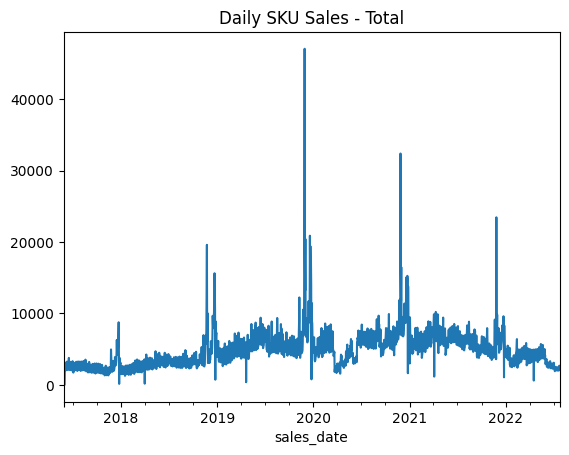

In [38]:
hierarchy_df['total'].plot(title="Daily SKU Sales - Total")

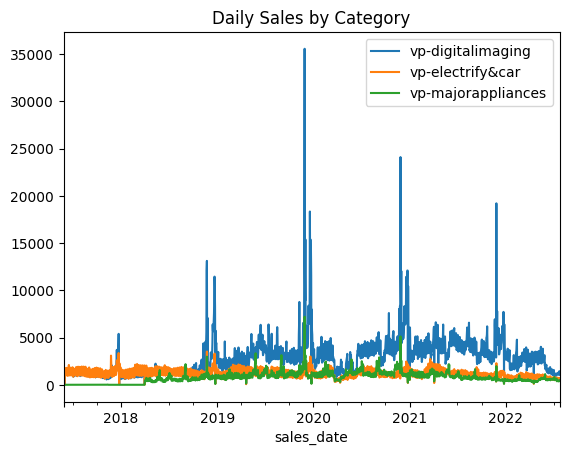

In [39]:
ax = hierarchy_df[hierarchy['total']].plot(title="Daily Sales by Category")
ax.legend(bbox_to_anchor=(1.0, 1.0))

In [45]:
#Auto-ARIMA: bottom-up approach

model_bu_arima = hts.HTSRegressor(model='auto_arima', revision_method='BU', n_jobs=0)
model_bu_arima = model_bu_arima.fit(hierarchy_df, hierarchy)

Fitting models: 100%|██████████| 732/732 [2:57:32<00:00, 14.55s/it]    


In [46]:
#predict the next seven days
pred_bu_arima = model_bu_arima.predict(steps_ahead=7)

Fitting models: 100%|██████████| 732/732 [00:02<00:00, 303.47it/s]


In [60]:
pred_bu_arima

,total,vp-digitalimaging,vp-electrify&car,vp-majorappliances,vp-digitalimaging_ml-ilccameras/lenses,vp-digitalimaging_ml-p&sandactioncamsanddrones,vp-digitalimaging_ml-diaccessories,vp-electrify&car_ml-connectedcar,vp-electrify&car_ml-electrify,vp-majorappliances_ml-kitchen,...,vp-majorappliances_ml-laundry_laundry_sotlelecdrybbhd_534,vp-majorappliances_ml-laundry_laundry_sotlgasdrybbhd_547,vp-majorappliances_ml-laundry_laundry_sotlgasdrybbhd_89,vp-majorappliances_ml-premium_premiummajorappl_sopacacchmdelreg_98,vp-majorappliances_ml-premium_premiummajorappl_sopacacchmdelreg_151,vp-majorappliances_ml-premium_premiummajorappl_sopacaccybbhd_517,vp-majorappliances_ml-premium_premiummajorappl_sopaccmoreg_148,vp-majorappliances_ml-premium_premiummajorappl_sopacfdrefrigreg_127,vp-majorappliances_ml-premium_premiummajorappl_sopacdishwashrreg_508,vp-majorappliances_ml-premium_premiummajorappl_sopacdishwashrreg_391
2017-05-28,149.369896,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2017-05-29,41.640509,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2017-05-30,40.423213,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2017-05-31,37.983089,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2017-06-01,37.120553,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-27,2255.250704,2.946304,0.732633,1.12582,1.448480,2.799195,3.148248,6.138516,1.887116,1.204724,...,6.138516,2.039483,1.108765,1.733194,1.066001,1.448480,1.12582,0.732633,1.492242,1.454062
2022-07-28,2376.569860,3.078714,0.732633,1.12582,1.455025,2.719945,3.212081,5.735047,1.887116,1.258361,...,5.735047,2.103316,1.108765,1.733091,0.986853,1.455025,1.12582,0.732633,1.624635,1.454080
2022-07-29,2495.025122,3.050848,0.732633,1.12582,1.389742,2.792449,3.264313,6.759916,1.887116,1.305667,...,6.759916,2.155548,1.108765,1.733084,1.059366,1.389742,1.12582,0.732633,1.596768,1.454080
2022-07-30,2510.560115,3.051024,0.732633,1.12582,1.317800,2.811061,3.307053,8.167360,1.887116,1.347390,...,8.167360,2.198288,1.108765,1.733083,1.077978,1.317800,1.12582,0.732633,1.596943,1.454080


In [63]:
pred_bu_arima.query("index > '2022-07-24'")

,total,vp-digitalimaging,vp-electrify&car,vp-majorappliances,vp-digitalimaging_ml-ilccameras/lenses,vp-digitalimaging_ml-p&sandactioncamsanddrones,vp-digitalimaging_ml-diaccessories,vp-electrify&car_ml-connectedcar,vp-electrify&car_ml-electrify,vp-majorappliances_ml-kitchen,...,vp-majorappliances_ml-laundry_laundry_sotlelecdrybbhd_534,vp-majorappliances_ml-laundry_laundry_sotlgasdrybbhd_547,vp-majorappliances_ml-laundry_laundry_sotlgasdrybbhd_89,vp-majorappliances_ml-premium_premiummajorappl_sopacacchmdelreg_98,vp-majorappliances_ml-premium_premiummajorappl_sopacacchmdelreg_151,vp-majorappliances_ml-premium_premiummajorappl_sopacaccybbhd_517,vp-majorappliances_ml-premium_premiummajorappl_sopaccmoreg_148,vp-majorappliances_ml-premium_premiummajorappl_sopacfdrefrigreg_127,vp-majorappliances_ml-premium_premiummajorappl_sopacdishwashrreg_508,vp-majorappliances_ml-premium_premiummajorappl_sopacdishwashrreg_391
2022-07-25,2176.129245,2.844636,0.732633,1.12582,1.593480,2.732569,2.990328,6.901006,1.887116,1.002296,...,6.901006,1.866136,1.124192,1.752993,0.979577,1.593480,1.12582,0.732633,1.406241,1.438395
2022-07-26,2280.065855,3.309309,0.732633,1.12582,1.505549,2.820175,3.061500,6.389187,1.887116,1.155902,...,6.389187,1.961473,1.100027,1.734568,1.085607,1.505549,1.12582,0.732633,1.855771,1.453538
2022-07-27,2255.250704,2.946304,0.732633,1.12582,1.448480,2.799195,3.148248,6.138516,1.887116,1.204724,...,6.138516,2.039483,1.108765,1.733194,1.066001,1.448480,1.12582,0.732633,1.492242,1.454062
2022-07-28,2376.569860,3.078714,0.732633,1.12582,1.455025,2.719945,3.212081,5.735047,1.887116,1.258361,...,5.735047,2.103316,1.108765,1.733091,0.986853,1.455025,1.12582,0.732633,1.624635,1.454080
2022-07-29,2495.025122,3.050848,0.732633,1.12582,1.389742,2.792449,3.264313,6.759916,1.887116,1.305667,...,6.759916,2.155548,1.108765,1.733084,1.059366,1.389742,1.12582,0.732633,1.596768,1.454080
2022-07-30,2510.560115,3.051024,0.732633,1.12582,1.317800,2.811061,3.307053,8.167360,1.887116,1.347390,...,8.167360,2.198288,1.108765,1.733083,1.077978,1.317800,1.12582,0.732633,1.596943,1.454080
2022-07-31,2455.516460,3.053775,0.732633,1.12582,1.331071,2.734543,3.342025,7.853206,1.887116,1.384188,...,7.853206,2.233260,1.108765,1.733083,1.001460,1.331071,1.12582,0.732633,1.599695,1.454080


In [92]:
updated_df

,total,vp-digitalimaging,vp-electrify&car,vp-majorappliances,vp-digitalimaging_ml-ilccameras/lenses,vp-digitalimaging_ml-p&sandactioncamsanddrones,vp-digitalimaging_ml-diaccessories,vp-electrify&car_ml-connectedcar,vp-electrify&car_ml-electrify,vp-majorappliances_ml-kitchen,...,vp-majorappliances_ml-laundry_laundry_sotlelecdrybbhd_534,vp-majorappliances_ml-laundry_laundry_sotlgasdrybbhd_547,vp-majorappliances_ml-laundry_laundry_sotlgasdrybbhd_89,vp-majorappliances_ml-premium_premiummajorappl_sopacacchmdelreg_98,vp-majorappliances_ml-premium_premiummajorappl_sopacacchmdelreg_151,vp-majorappliances_ml-premium_premiummajorappl_sopacaccybbhd_517,vp-majorappliances_ml-premium_premiummajorappl_sopaccmoreg_148,vp-majorappliances_ml-premium_premiummajorappl_sopacfdrefrigreg_127,vp-majorappliances_ml-premium_premiummajorappl_sopacdishwashrreg_508,vp-majorappliances_ml-premium_premiummajorappl_sopacdishwashrreg_391
2022-07-25,2176.129245,2.844636,0.732633,1.12582,1.593480,2.732569,2.990328,6.901006,1.887116,1.002296,...,6.901006,1.866136,1.124192,1.752993,0.979577,1.593480,1.12582,0.732633,1.406241,1.438395
2022-07-26,2280.065855,3.309309,0.732633,1.12582,1.505549,2.820175,3.061500,6.389187,1.887116,1.155902,...,6.389187,1.961473,1.100027,1.734568,1.085607,1.505549,1.12582,0.732633,1.855771,1.453538
2022-07-27,2255.250704,2.946304,0.732633,1.12582,1.448480,2.799195,3.148248,6.138516,1.887116,1.204724,...,6.138516,2.039483,1.108765,1.733194,1.066001,1.448480,1.12582,0.732633,1.492242,1.454062
2022-07-28,2376.569860,3.078714,0.732633,1.12582,1.455025,2.719945,3.212081,5.735047,1.887116,1.258361,...,5.735047,2.103316,1.108765,1.733091,0.986853,1.455025,1.12582,0.732633,1.624635,1.454080
2022-07-29,2495.025122,3.050848,0.732633,1.12582,1.389742,2.792449,3.264313,6.759916,1.887116,1.305667,...,6.759916,2.155548,1.108765,1.733084,1.059366,1.389742,1.12582,0.732633,1.596768,1.454080
2022-07-30,2510.560115,3.051024,0.732633,1.12582,1.317800,2.811061,3.307053,8.167360,1.887116,1.347390,...,8.167360,2.198288,1.108765,1.733083,1.077978,1.317800,1.12582,0.732633,1.596943,1.454080
2022-07-31,2455.516460,3.053775,0.732633,1.12582,1.331071,2.734543,3.342025,7.853206,1.887116,1.384188,...,7.853206,2.233260,1.108765,1.733083,1.001460,1.331071,1.12582,0.732633,1.599695,1.454080


In [48]:
import matplotlib.pyplot as plt

In [49]:
test = pd.read_excel(
    open(
        r'C:\Users\cmgas\OneDrive\git\Best-Buy-Case\test_data.xlsx', 'rb'),
)

In [62]:
test.head(5)

,encoded_sku_id,sales_date,subclass_name,class_name,ml_name,category_name,retail_price,promo_price,competitor_price,inventory,...,gspi,index of consumer sentiment,sales_year,sales_month,sales_day,sales_weekday,cat_ml_class_sub_sku,cat_ml_class_sub,cat_ml_class,cat_ml
0,55,2022-07-25,soelsingovenreg,builtincooking,ml-kitchen,vp-majorappliances,1844.99,1599.99,NaN,Fully-Stocked,...,2.350644,51.5,2022,7,25,0,vp-majorappliances_ml-kitchen_builtincooking_s...,vp-majorappliances_ml-kitchen_builtincooking_s...,vp-majorappliances_ml-kitchen_builtincooking,vp-majorappliances_ml-kitchen
1,140,2022-07-25,dishwasher,dishwashers,ml-kitchen,vp-majorappliances,566.99,NaN,566.0,Out-of-Stock,...,2.350644,51.5,2022,7,25,0,vp-majorappliances_ml-kitchen_dishwashers_dish...,vp-majorappliances_ml-kitchen_dishwashers_dish...,vp-majorappliances_ml-kitchen_dishwashers,vp-majorappliances_ml-kitchen
2,202,2022-07-25,toploadelecdryer,laundry,ml-laundry,vp-majorappliances,989.99,NaN,NaN,Out-of-Stock,...,2.350644,51.5,2022,7,25,0,vp-majorappliances_ml-laundry_laundry_toploade...,vp-majorappliances_ml-laundry_laundry_toploade...,vp-majorappliances_ml-laundry_laundry,vp-majorappliances_ml-laundry
3,1,2022-07-25,misccameraacces,digitalcameraaccy,ml-diaccessories,vp-digitalimaging,89.99,NaN,68.9,Fully-Stocked,...,2.350644,51.5,2022,7,25,0,vp-digitalimaging_ml-diaccessories_digitalcame...,vp-digitalimaging_ml-diaccessories_digitalcame...,vp-digitalimaging_ml-diaccessories_digitalcame...,vp-digitalimaging_ml-diaccessories
4,3,2022-07-25,soparts,mobileaccessories,ml-connectedcar,vp-electrify&car,49.99,NaN,NaN,Fully-Stocked,...,2.350644,51.5,2022,7,25,0,vp-electrify&car_ml-connectedcar_mobileaccesso...,vp-electrify&car_ml-connectedcar_mobileaccesso...,vp-electrify&car_ml-connectedcar_mobileaccesso...,vp-electrify&car_ml-connectedcar


In [51]:
test =  test.astype({'Encoded_SKU_ID':'str'})
test.columns = [col_name.lower() for col_name in test.columns]
test["subclass_name"] = test["subclass_name"].apply(lambda x: x.lower().replace(" ", ""))
test["class_name"] = test["class_name"].apply(lambda x: x.lower().replace(" ", ""))
test["ml_name"] = test["ml_name"].apply(lambda x: x.lower().replace(" ", ""))
test["category_name"] = test["category_name"].apply(lambda x: x.lower().replace(" ", ""))

In [52]:
test["cat_ml_class_sub_sku"] = test.apply(lambda x: f"{x['category_name']}_{x['ml_name']}_{x['class_name']}_{x['subclass_name']}_{x['encoded_sku_id']}", axis=1)
test["cat_ml_class_sub"] = test.apply(lambda x: f"{x['category_name']}_{x['ml_name']}_{x['class_name']}_{x['subclass_name']}", axis=1)
test["cat_ml_class"] = test.apply(lambda x: f"{x['category_name']}_{x['ml_name']}_{x['class_name']}", axis=1)
test["cat_ml"] = test.apply(lambda x: f"{x['category_name']}_{x['ml_name']}", axis=1)

In [53]:
test_level_6 = np.round(pd.pivot_table(test, values='daily_units', index='sales_date', columns='cat_ml_class_sub_sku'))
test_level_5 = test.groupby(["subclass_name", "class_name", "ml_name", "category_name", "sales_date", "cat_ml_class_sub"])['daily_units'].sum().reset_index(drop=False) \
    .pivot(index="sales_date", columns="cat_ml_class_sub", values="daily_units")
test_level_4 = test.groupby(["class_name", "ml_name", "category_name", "sales_date", "cat_ml_class"])['daily_units'].sum().reset_index(drop=False) \
    .pivot(index="sales_date", columns="cat_ml_class", values="daily_units")
test_level_3 = test.groupby(["ml_name", "category_name", "sales_date", "cat_ml"])['daily_units'].sum().reset_index(drop=False) \
    .pivot(index="sales_date", columns="cat_ml", values="daily_units")
test_level_2 = test.groupby(["category_name", "sales_date"])['daily_units'].sum().reset_index(drop=False) \
    .pivot(index="sales_date", columns="category_name", values="daily_units")
test_level_1 = test.groupby("sales_date")['daily_units'].sum().to_frame().rename(columns={'daily_units': 'total'})


In [54]:
test_hierarchy_df = pd.DataFrame()
test_hierarchy_df = test_level_6.join(test_level_5).join(test_level_4).join(test_level_3).join(test_level_2).join(test_level_1) 
test_hierarchy_df.index = pd.to_datetime(test_hierarchy_df.index)

In [55]:
test_hierarchy_df

,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_163,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_229,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_252,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_484,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_542,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_557,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_8,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_camerabatteries_107,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_camerabatteries_197,vp-digitalimaging_ml-diaccessories_digitalcameraaccy_camerabatteries_2,...,vp-digitalimaging_ml-p&sandactioncamsanddrones,vp-electrify&car_ml-connectedcar,vp-electrify&car_ml-electrify,vp-majorappliances_ml-kitchen,vp-majorappliances_ml-laundry,vp-majorappliances_ml-premium,vp-digitalimaging,vp-electrify&car,vp-majorappliances,total
sales_date,,,,,,,,,,,,,,,,,,,,,
2022-07-25,0.0,1.0,23.0,6.0,0.0,71.0,4.0,2.0,3.0,4.0,...,23,591,5,334,85,11,980,596,430,2006
2022-07-26,0.0,1.0,27.0,0.0,0.0,82.0,3.0,1.0,7.0,1.0,...,17,486,0,346,94,12,976,486,452,1914
2022-07-27,0.0,1.0,20.0,2.0,1.0,58.0,2.0,2.0,5.0,5.0,...,17,517,0,309,82,8,923,517,399,1839
2022-07-28,1.0,1.0,28.0,2.0,0.0,64.0,6.0,1.0,7.0,5.0,...,14,463,3,277,89,6,1021,466,372,1859
2022-07-29,0.0,3.0,28.0,1.0,0.0,83.0,7.0,1.0,4.0,3.0,...,14,621,1,313,116,14,1227,622,443,2292
2022-07-30,1.0,3.0,37.0,0.0,0.0,81.0,4.0,2.0,10.0,3.0,...,22,704,1,306,138,12,1385,705,456,2546
2022-07-31,0.0,3.0,24.0,1.0,1.0,55.0,3.0,2.0,5.0,2.0,...,19,579,1,257,136,4,886,580,397,1863


In [99]:
updated_df

,total,vp-digitalimaging,vp-electrify&car,vp-majorappliances,vp-digitalimaging_ml-ilccameras/lenses,vp-digitalimaging_ml-p&sandactioncamsanddrones,vp-digitalimaging_ml-diaccessories,vp-electrify&car_ml-connectedcar,vp-electrify&car_ml-electrify,vp-majorappliances_ml-kitchen,...,vp-majorappliances_ml-laundry_laundry_sotlelecdrybbhd_534,vp-majorappliances_ml-laundry_laundry_sotlgasdrybbhd_547,vp-majorappliances_ml-laundry_laundry_sotlgasdrybbhd_89,vp-majorappliances_ml-premium_premiummajorappl_sopacacchmdelreg_98,vp-majorappliances_ml-premium_premiummajorappl_sopacacchmdelreg_151,vp-majorappliances_ml-premium_premiummajorappl_sopacaccybbhd_517,vp-majorappliances_ml-premium_premiummajorappl_sopaccmoreg_148,vp-majorappliances_ml-premium_premiummajorappl_sopacfdrefrigreg_127,vp-majorappliances_ml-premium_premiummajorappl_sopacdishwashrreg_508,vp-majorappliances_ml-premium_premiummajorappl_sopacdishwashrreg_391
2022-07-25,2176.129245,2.844636,0.732633,1.12582,1.593480,2.732569,2.990328,6.901006,1.887116,1.002296,...,6.901006,1.866136,1.124192,1.752993,0.979577,1.593480,1.12582,0.732633,1.406241,1.438395
2022-07-26,2280.065855,3.309309,0.732633,1.12582,1.505549,2.820175,3.061500,6.389187,1.887116,1.155902,...,6.389187,1.961473,1.100027,1.734568,1.085607,1.505549,1.12582,0.732633,1.855771,1.453538
2022-07-27,2255.250704,2.946304,0.732633,1.12582,1.448480,2.799195,3.148248,6.138516,1.887116,1.204724,...,6.138516,2.039483,1.108765,1.733194,1.066001,1.448480,1.12582,0.732633,1.492242,1.454062
2022-07-28,2376.569860,3.078714,0.732633,1.12582,1.455025,2.719945,3.212081,5.735047,1.887116,1.258361,...,5.735047,2.103316,1.108765,1.733091,0.986853,1.455025,1.12582,0.732633,1.624635,1.454080
2022-07-29,2495.025122,3.050848,0.732633,1.12582,1.389742,2.792449,3.264313,6.759916,1.887116,1.305667,...,6.759916,2.155548,1.108765,1.733084,1.059366,1.389742,1.12582,0.732633,1.596768,1.454080
2022-07-30,2510.560115,3.051024,0.732633,1.12582,1.317800,2.811061,3.307053,8.167360,1.887116,1.347390,...,8.167360,2.198288,1.108765,1.733083,1.077978,1.317800,1.12582,0.732633,1.596943,1.454080
2022-07-31,2455.516460,3.053775,0.732633,1.12582,1.331071,2.734543,3.342025,7.853206,1.887116,1.384188,...,7.853206,2.233260,1.108765,1.733083,1.001460,1.331071,1.12582,0.732633,1.599695,1.454080


In [97]:
test_hierarchy_df.replace(np.nan, 0, inplace= True)

In [56]:
from sklearn import metrics

In [100]:
#drop the repetitive columns from the prediction df so we can test it against the test data
test_hierarchy_df.columns.symmetric_difference(updated_df.columns)

Index(['vp-digitalimaging_ml-diaccessories_digitalcameraaccy_socameraaccy',
       'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_socameraaccy_562',
       'vp-digitalimaging_ml-ilccameras/lenses_cameras-ilc_dslrcameras_438',
       'vp-digitalimaging_ml-ilccameras/lenses_lenses_lensescore_257',
       'vp-digitalimaging_ml-ilccameras/lenses_lenses_lensescore_269',
       'vp-electrify&car_ml-connectedcar_carstereo_powersports_70'],
      dtype='object')

In [101]:
updated_df_2 = updated_df.drop(['vp-digitalimaging_ml-diaccessories_digitalcameraaccy_socameraaccy',
       'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_socameraaccy_562',
       'vp-digitalimaging_ml-ilccameras/lenses_cameras-ilc_dslrcameras_438',
       'vp-digitalimaging_ml-ilccameras/lenses_lenses_lensescore_257',
       'vp-digitalimaging_ml-ilccameras/lenses_lenses_lensescore_269',
       'vp-electrify&car_ml-connectedcar_carstereo_powersports_70'], axis = 1)

In [108]:
set((updated_df_2).columns).intersection(set(test_hierarchy_df.columns))

{'total',
 'vp-digitalimaging',
 'vp-digitalimaging_ml-diaccessories',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_163',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_229',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_252',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_484',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_542',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_557',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_actioncamaccy_8',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_camerabatteries',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_camerabatteries_107',
 'vp-digitalimaging_ml-diaccessories_digitalcameraaccy_camerabatteries_197',
 'vp-digitalimaging_ml-diaccessories_digitalcameraa

In [115]:
updated_df_2.columns.difference(test_hierarchy_df.columns).tolist()

[]

In [118]:
print(len(list(updated_df_2.columns)))
print(len(list(test_hierarchy_df.columns)))
print(len(set(updated_df_2.columns)))
print(len(set(test_hierarchy_df.columns)))

726
722
722
722


In [119]:
updated_df_3 = updated_df_2.loc[:,~updated_df_2.columns.duplicated()].copy()

In [120]:
print(len(list(updated_df_3.columns)))

722


In [123]:
#test the next seven days
mae = metrics.mean_absolute_error(test_hierarchy_df, updated_df_3)
mse = metrics.mean_squared_error(test_hierarchy_df, updated_df_3)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(test_hierarchy_df, updated_df_3)

print("Results of Bottom Up ARIMA:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Bottom Up ARIMA:
MAE: 33.96688591433384
MSE: 27516.59451571593
RMSE: 165.8812663193645
R-Squared: -55088.99743387868


NameError: name 'PLOT_FROM' is not defined

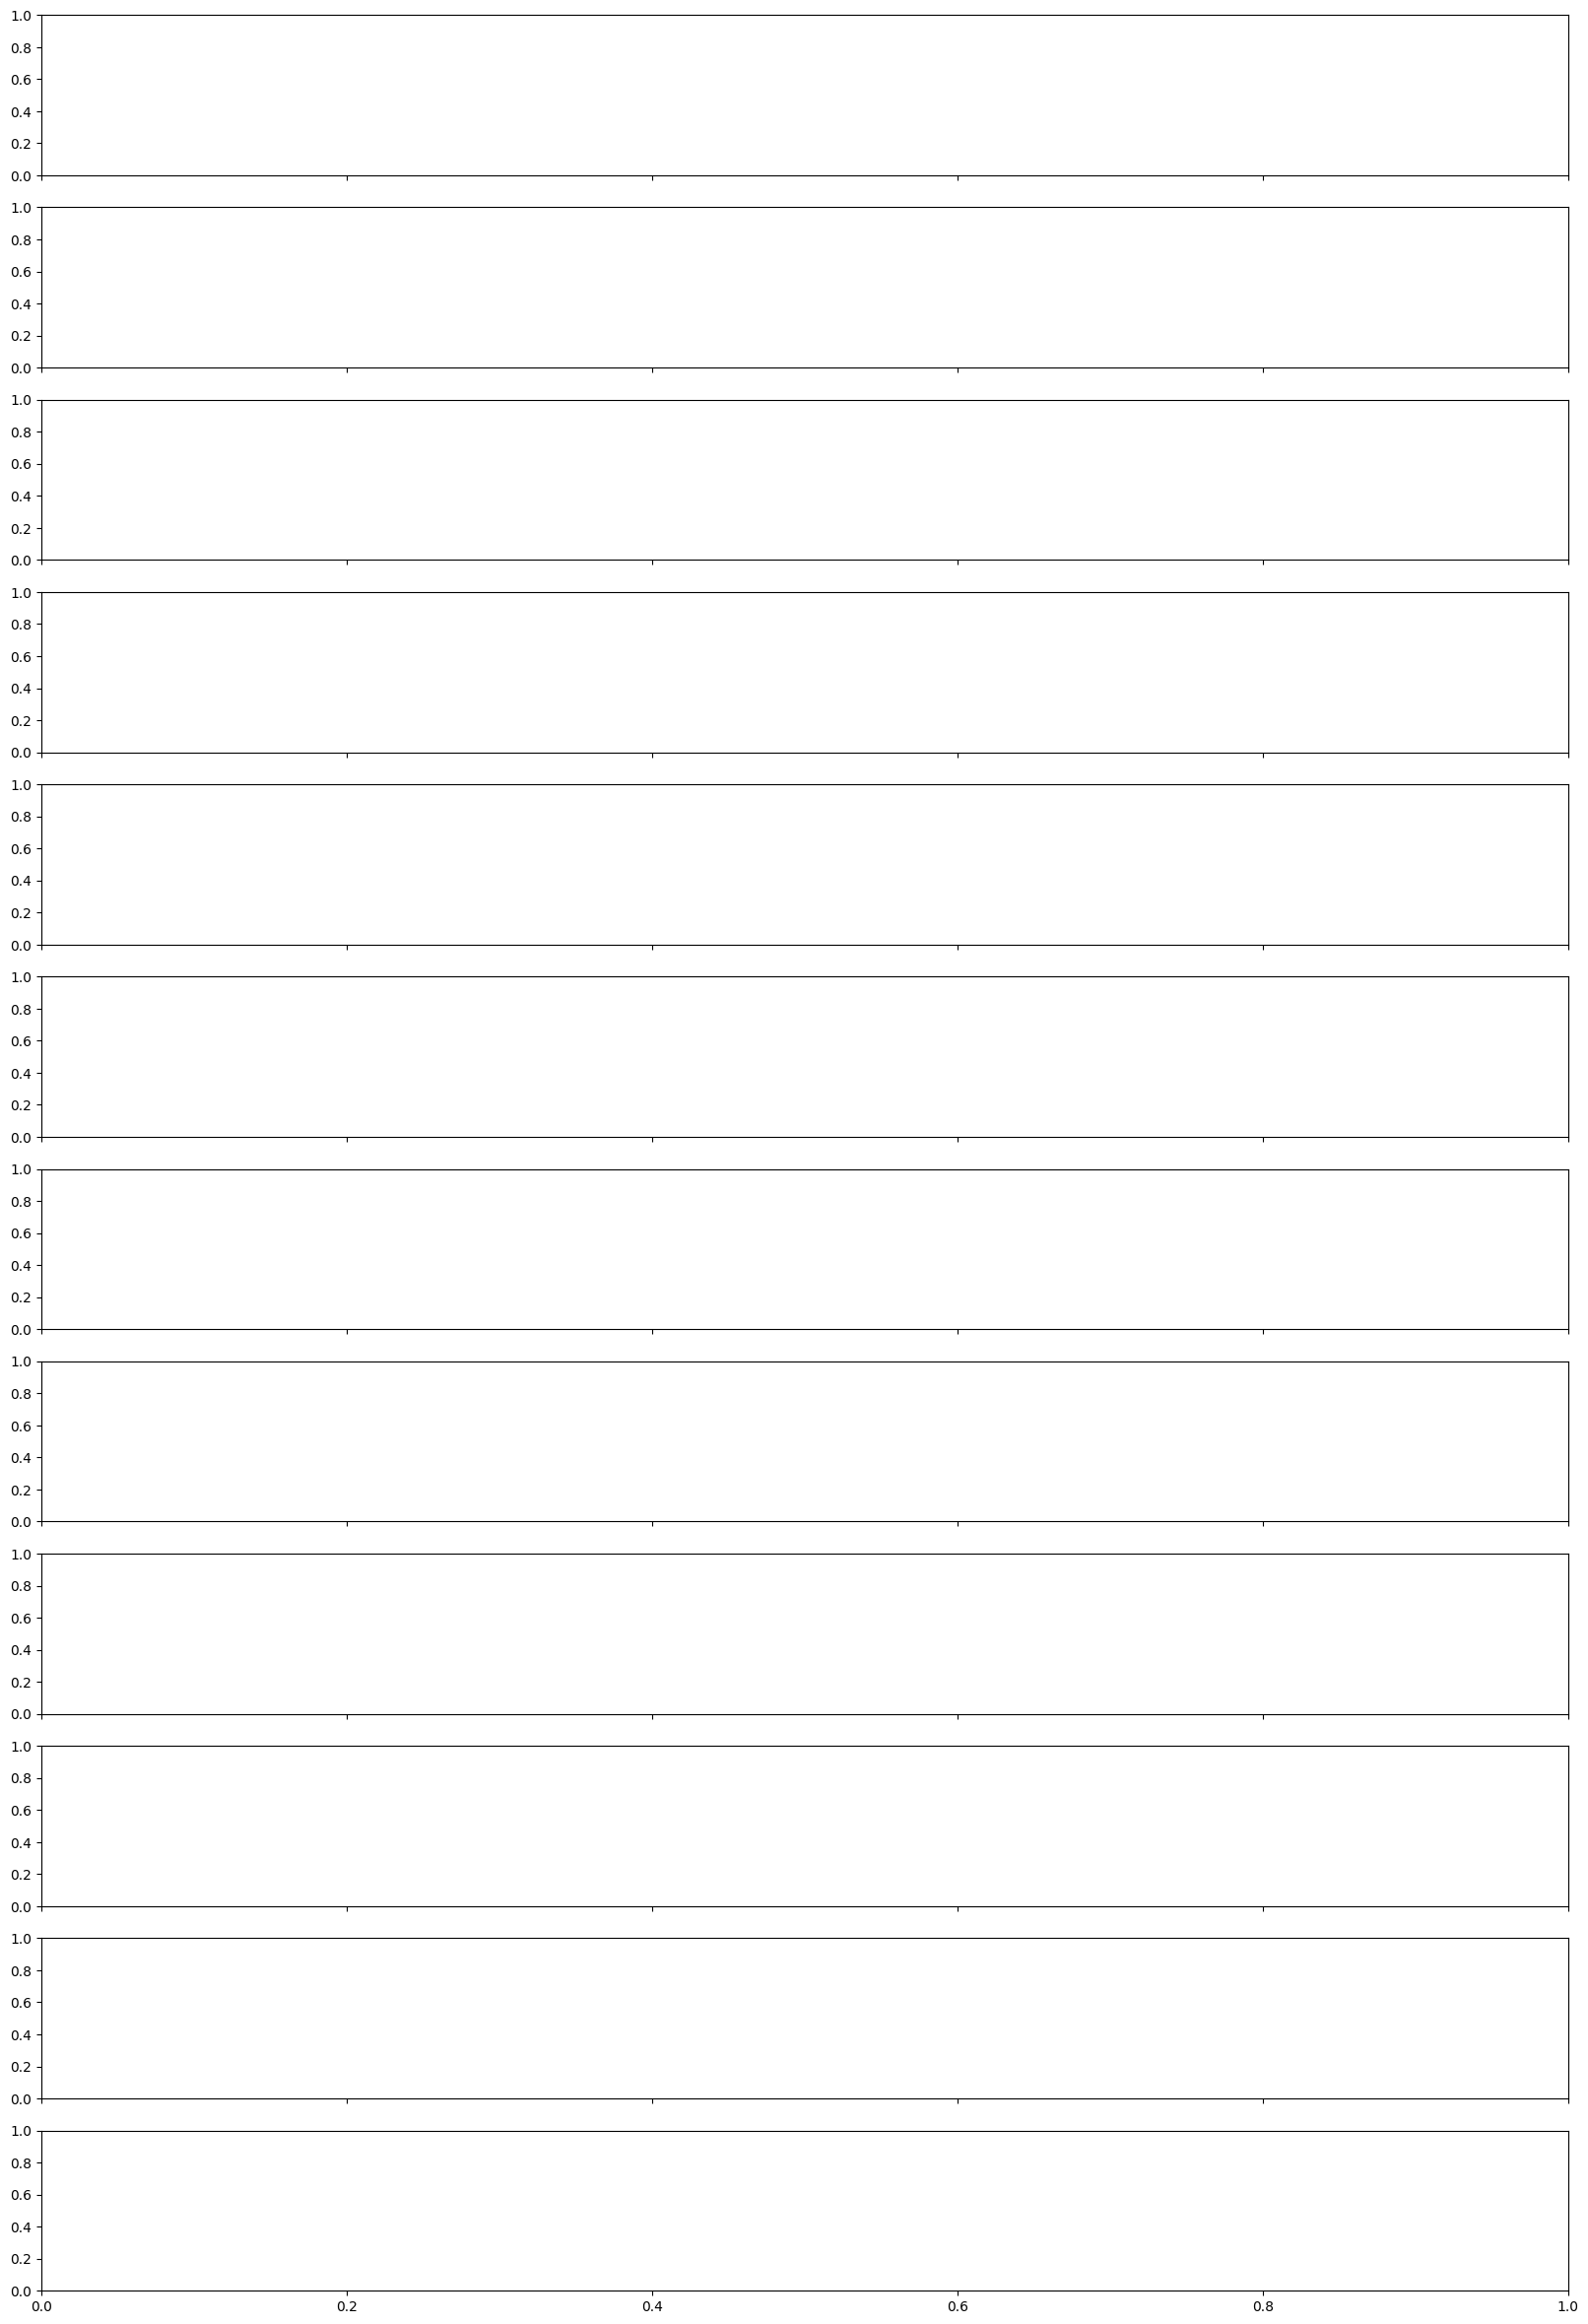

In [124]:
PLOT = ['total', 
        'vp_digitalimaging',
        'vp-electrify&car', 
        'vp-majorappliances',
        'vp-digitalimaging_ml-ilccameras/lenses',
        'vp-digitalimaging_ml-p&sandactioncamsanddrones', 
        'vp-digitalimaging_ml-diaccessories',
        'vp-electrify&car_ml-connectedcar', 
        'vp-electrify&car_ml-electrify',
        'vp-majorappliances_ml-kitchen',
        'vp-majorappliances_ml-laundry',
        'vp-majorappliances_ml-premium'
       ]

fig, axs = plt.subplots(len(PLOT), figsize=(20, 30), sharex=True)
ax.grid(alpha=0.75)

dts = pred_bu_arima[PLOT_FROM:].index

for i, group in enumerate(PLOT):
    axs[i].plot(hierarchy_df[PLOT_FROM:][group], 
            lw=1.1, 
            color='#2ecc71', 
            alpha=0.8, 
            label='Truth')
    axs[i].plot(pred_bu_arima[PLOT_FROM:][group], 
            lw=1.1,
            color='#e74c3c', 
            alpha=0.8, 
            label='Prediction')
    axs[i].legend()
    axs[i].set_title('Prediction VS True series')